<a href="https://colab.research.google.com/github/ajay398/new-proj./blob/main/Bank_Customer_Churn_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project** - Bank Customer Churn Prediction

# **Objective**-
To develop a predictive model that identifies customers at risk of churning (leaving the bank) to enable the bank to take proactive measures to retain them.

# **Data Source**--
Type: Structured data
Description: The dataset typically includes customer information such as demographics, account information, transaction history, customer behavior, and interaction with the bank's services. This may be sourced from the bank's internal database or publicly available datasets for similar studies.

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import *Data*

In [ ]:
Bank_churn = pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Describe *Data*

In [ ]:
Bank_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
Bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
#check any duplicated value
Bank_churn.duplicated().sum()

0

In [ ]:
#CustomerId column set as set_index type
Bank_churn.set_index('CustomerId', inplace=True)

In [ ]:
#now check again here
Bank_churn.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#again check
Bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
Bank_churn.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data **Visualization**

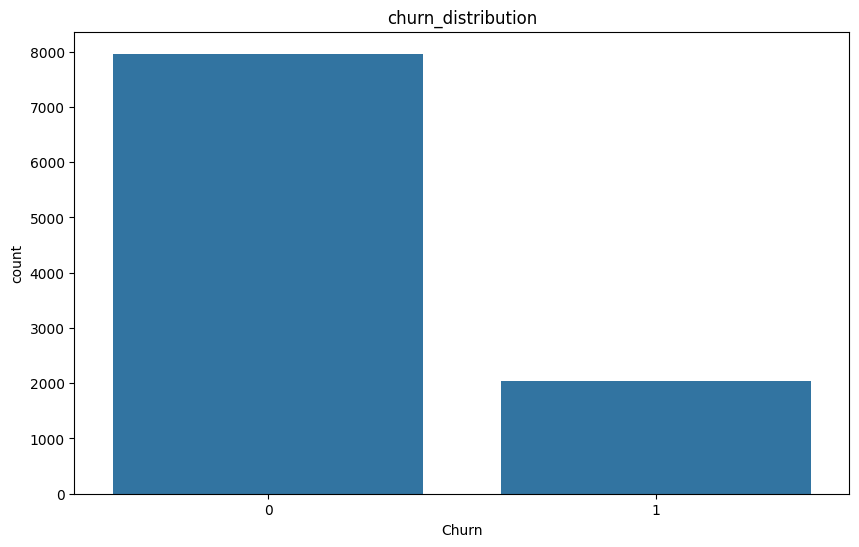

In [ ]:
#first Iam  make a count plot and check chunk distribution
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', data = Bank_churn)
plt.title('churn_distribution')
plt.show()



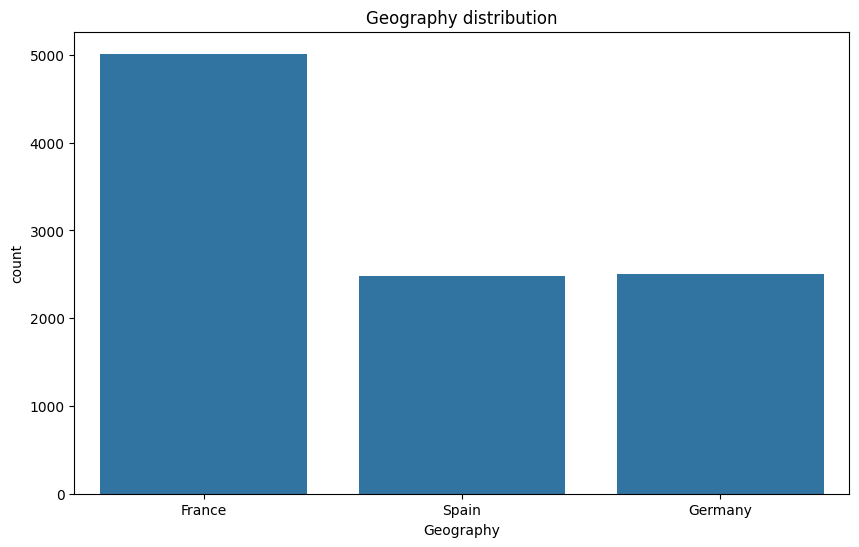

In [ ]:
#here Iam  make a count plot and check Geograpy distribution

plt.figure(figsize=(10,6))
sns.countplot(x = 'Geography',data = Bank_churn)
plt.title('Geography distribution')
plt.show()

# Data **Preprocessing**
1. **check missing** **value**
2.**Encoding**

In [ ]:
# Check for missing values
Bank_churn.isnull().sum()

,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
Num Of Products,0
Has Credit Card,0
Is Active Member,0


2.**Encoding** **data**

In [ ]:
#check the Geography columns
Bank_churn['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
#here replace France,Germany and Spain into (2,1,0)
Bank_churn.replace({'Geography': {'France':2,'Germany':1,'Spain':0}}, inplace=True)

In [ ]:
#check the Gender column
Bank_churn['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# here we replce Male and Female into (0,1)
Bank_churn.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [ ]:
#check the Num Of Products
Bank_churn['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
# here replce 1 into 0 and other 2,3,4 into 1
Bank_churn.replace({'Num Of Products':{1:0,2:1,3:1,4:1}}, inplace=True)

In [ ]:
# here check Has Credit Card column
Bank_churn['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [ ]:
#here check Is Active Member column
Bank_churn['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
# here take balance 0 and check who chrun aur not
Bank_churn.loc[(Bank_churn['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
Bank_churn['Zero Balance'] = np.where(Bank_churn['Balance']>0, 1, 0)

<Axes: >

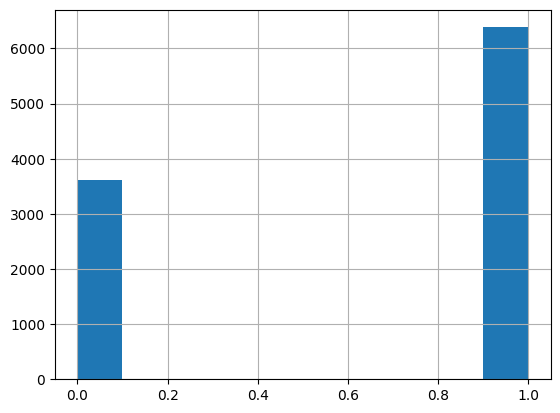

In [ ]:
Bank_churn['Zero Balance'].hist()

In [ ]:
#use groupby function for churn and Geography
Bank_churn.groupby(['Geography','Churn']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Geography Churn                                                        
0         0         2064         2064    2064  2064    2064     2064   
          1          413          413     413   413     413      413   
1         0         1695         1695    1695  1695    1695     1695   
          1          814          814     814   814     814      814   
2         0         4204         4204    4204  4204    4204     4204   
          1          810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Geography Churn                                                       
0         0                 2064             2064              2064   
          1                  413              413               413   
1         0                 1695             1695              1695   
          1                  814              814               814   
2         0                 4204             4204              4204   
          1                  810              810               810   

                 Estimated Salary  Zero Balance  
Geography Churn                                  
0         0                  2064          2064  
          1                   413           413  
1         0                  1695          1695  
          1                   814           814  
2         0                  4204          4204  
          1                   810           810

# Define Target Variable (y) and Feature Variables (X)

In [ ]:
Bank_churn.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
#here we take independent columns
X  = Bank_churn.drop(['Surname','Churn'], axis =1)
Y = Bank_churn['Churn']

In [ ]:
#we check shape of x and y
X.shape, Y.shape

((10000, 11), (10000,))

In [ ]:
# assume 'Bank churn' is your dataset and 'target' is your target variable
target_counts = Bank_churn['Churn'].value_counts()
print(target_counts)

Churn
0    7963
1    2037
Name: count, dtype: int64


# ***Handling imbalanced data***
1.**Random Undersampling**
2.**RandomOverSampler**

In [ ]:
Bank_churn['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
RUS  = RandomUnderSampler(random_state = 2529)
X_RUS, Y_RUS = RUS.fit_resample(X,Y)

In [ ]:
#CHECK the shape of x_rus and y_rus
X_RUS.shape, Y_RUS.shape, X.shape, Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
Y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
Y_RUS.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: >

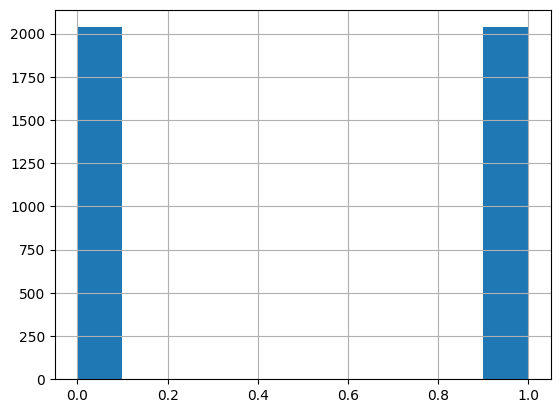

In [ ]:
#check Y_RUS hist. plot
Y_RUS.hist()


In [ ]:
#RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 2529)
X_ROS, Y_ROS = ROS.fit_resample(X,Y)


In [ ]:
#check shape of x_ros and y_ros
X_ROS.shape, Y_ROS.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
Y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
Y_ROS.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: >

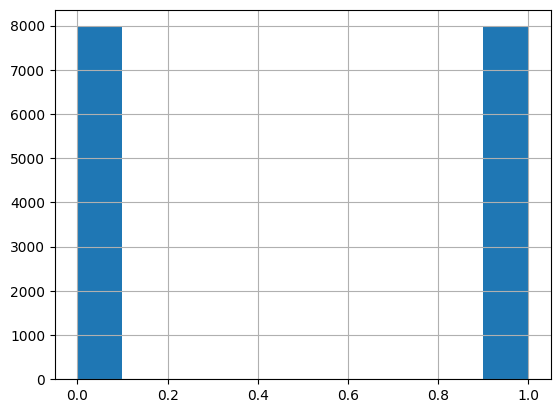

In [ ]:
# check y_ros with hist. plot
Y_ROS.hist()

# **Train Test Split**
**here we split three datas our Orginal data and RUS data AND ROS data**

In [ ]:
#import sklearn test_split data library
from sklearn.model_selection import train_test_split

In [ ]:
#split Orginal data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state= 2530)

In [ ]:
#split RandomUnderSample Data
X_train_RUS, X_test_RUS, Y_train_RUS, Y_test_RUS = train_test_split(X_RUS,Y_RUS,  random_state=2530)

In [ ]:
#split ROS data
X_train_ROS, X_test_ROS, Y_train_ROS, Y_test_ROS = train_test_split(X_ROS,Y_ROS,  random_state=2530)

# **Standardize** **Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
#Standardize orignal data
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = ss.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
#satandardize RUS data
X_train_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = ss.fit_transform(X_train_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = ss.fit_transform(X_test_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [ ]:
#standardize ROS data
X_train_ROS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = ss.fit_transform(X_train_ROS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_ROS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = ss.fit_transform(X_test_ROS[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


# **we use Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Modeling**

In [ ]:
# Train an Random Forest classification model on the orignal training data
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)



RandomForestClassifier()

# **Model Evaluation**

In [ ]:
# Make predictions on the orignal testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Accuracy: 0.8386666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2368
           1       0.76      0.34      0.47       632

    accuracy                           0.84      3000
   macro avg       0.80      0.66      0.69      3000
weighted avg       0.83      0.84      0.81      3000



In [ ]:
#for RUS model
rf_model.fit(X_train_RUS, Y_train_RUS)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test_RUS)



In [ ]:
# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_RUS, y_pred))
print('Classification Report:')
print(classification_report(Y_test_RUS, y_pred))

Accuracy: 0.7065750736015701
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       536
           1       0.69      0.68      0.69       483

    accuracy                           0.71      1019
   macro avg       0.71      0.71      0.71      1019
weighted avg       0.71      0.71      0.71      1019



In [ ]:
#for ROS model
rf_model.fit(X_train_ROS, Y_train_ROS)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test_ROS)

In [ ]:
## Evaluate the model
print('Accuracy:', accuracy_score(Y_test_ROS, y_pred))
print('Classification Report:')
print(classification_report(Y_test_ROS, y_pred))

Accuracy: 0.9324460070316424
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1978
           1       0.91      0.96      0.93      2004

    accuracy                           0.93      3982
   macro avg       0.93      0.93      0.93      3982
weighted avg       0.93      0.93      0.93      3982



# **summary**


1. Objective:

The main objective is to develop a predictive model to identify customers who are likely to churn.
                                                                           

Data Source: The model uses structured data, including customer demographics, account information, transaction history, and customer interactions with the bank's services.

2. Data Preprocessing:

The dataset is cleaned and preprocessed by handling missing values, encoding categorical variables (like geography and gender), and transforming other variables to make them suitable for modeling.
Steps include checking for duplicates, setting a customer ID as the index, and creating new features like "Zero Balance."

3. Handling Imbalanced Data:

The churn data is imbalanced, with more non-churning customers than churning ones. To address this, the document discusses methods like Random Undersampling (RUS) and Random Oversampling (ROS).

4. Modeling:

The Random Forest classifier is used for predicting customer churn. This model is trained on the preprocessed data, and its performance is evaluated using metrics like accuracy, precision, recall, and the F1-score.

5. Evaluation:

The model's performance is measured by its ability to correctly predict which customers will churn. For instance, the Random Forest model achieved an accuracy of about (0.94) = 94% and my model f1 score is (for 1 )- 94%   and (for 0 )- 93%